In [1]:
!ls

Untitled.ipynb         WeatherPyStarter.ipynb api_keys.py
WeatherPy.ipynb        __pycache__


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['hobart', 'havelock', 'atuona', 'vao', 'codrington', 'malpe', 'ushuaia', 'san pedro', 'cape town', 'mataura', 'abalak', 'torbay', 'puerto ayora', 'hamilton', 'new norfolk', 'algiers', 'barentsburg', 'touros', 'sentyabrskiy', 'rio grande', 'shatrovo', 'pevek', 'busselton', 'huarmey', 'victoria', 'punta arenas', 'longyearbyen', 'ponta do sol', 'manggar', 'nome', 'rikitea', 'bengkulu', 'waddan', 'bimbo', 'dikson', 'taltal', 'morant bay', 'ribeira grande', 'yellowknife', 'barrow', 'saskylakh', 'omsukchan', 'saint-philippe', 'hithadhoo', 'thompson', 'general roca', 'okha', 'tiksi', 'kucevo', 'torata', 'yokadouma', 'kaitangata', 'tasiilaq', 'dunedin', 'pergamino', 'cidreira', 'east london', 'sao joao da barra', 'muros', 'gobindapur', 'san rafael del sur', 'pisco', 'darnah', 'laguna', 'tepetzintla', 'jamestown', 'takoradi', 'upernavik', 'illoqqortoormiut', 'khatanga', 'arraial do cabo', 'lolua', 'qaanaaq', 'georgetown', 'midland', 'port keats', 'benghazi', 'port alfred', 'port hardy', 'uwayl

In [11]:
#run a test api call for a single city and print the json response
testurl = "http://api.openweathermap.org/data/2.5/weather?q="
key = f"&appid={weather_api_key}"
units = "&units=imperial"

testresponse = requests.get(testurl + "london" + key + units).json()
pprint(testresponse)

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1627148111,
 'id': 2643743,
 'main': {'feels_like': 72.03,
          'humidity': 76,
          'pressure': 1007,
          'temp': 71.6,
          'temp_max': 74.91,
          'temp_min': 67.55},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2006068,
         'sunrise': 1627099957,
         'sunset': 1627156865,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 10.36}}


In [5]:
print(testresponse['name'].replace("C",""))


KeyError: 'name'

In [12]:
cities_url = "http://api.openweathermap.org/data/2.5/weather?q="
key = f"&appid={weather_api_key}"
units = "&units=imperial"

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

city_count = 0

for city in cities:
    try:
        wresponse = requests.get(cities_url + city + key + units).json()
        City.append(wresponse['name'])
        Lat.append(wresponse['coord']['lat'])
        Lng.append(wresponse['coord']['lon'])
        Max_Temp.append(wresponse['main']['temp_max'])
        Humidity.append(wresponse['main']['humidity'])
        Cloudiness.append(wresponse['clouds']['all'])
        Wind_Speed.append(wresponse['wind']['speed'])
        Country.append(wresponse['sys']['country'])
        Date.append(wresponse['dt'])
        city_count +=1
        print(f"Processing Record {city_count} for {city}")
    except:
        print("City not found. Skipping.")

Processing Record 1 for hobart
Processing Record 2 for havelock
Processing Record 3 for atuona
Processing Record 4 for vao
Processing Record 5 for codrington
Processing Record 6 for malpe
Processing Record 7 for ushuaia
Processing Record 8 for san pedro
Processing Record 9 for cape town
Processing Record 10 for mataura
Processing Record 11 for abalak
Processing Record 12 for torbay
Processing Record 13 for puerto ayora
Processing Record 14 for hamilton
Processing Record 15 for new norfolk
Processing Record 16 for algiers
City not found. Skipping.
Processing Record 17 for touros
City not found. Skipping.
Processing Record 18 for rio grande
Processing Record 19 for shatrovo
Processing Record 20 for pevek
Processing Record 21 for busselton
Processing Record 22 for huarmey
Processing Record 23 for victoria
Processing Record 24 for punta arenas
Processing Record 25 for longyearbyen
Processing Record 26 for ponta do sol
Processing Record 27 for manggar
Processing Record 28 for nome
Processin

In [13]:
# confirm appropriate number of records collects
len(City)

544

In [ ]:
print(City)

In [14]:
#create a dataframe from the collected data

weather_df = pd.DataFrame({"City":City, "Lat":Lat,"Lng":Lng, "Max Temp":Max_Temp,
                           "Humidity":Humidity, "Cloudiness":Cloudiness, "Wind Speed":Wind_Speed,
                           "Country" : Country, "Date": Date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,44.92,77,99,1.99,AU,1627148245
1,Havelock,34.8791,-76.9013,86.99,58,1,5.99,US,1627148245
2,Atuona,-9.8000,-139.0333,77.97,70,96,16.20,PF,1627147805
3,Vao,-22.6667,167.4833,70.81,84,19,5.68,NC,1627147805
4,Codrington,-38.2667,141.9667,44.98,76,99,23.40,AU,1627147806


In [19]:
# write the data to a csv file and store it in the output folder
weather_csv = weather_df.copy()

weather_csv.to_csv(r'../output_data/cities.csv')

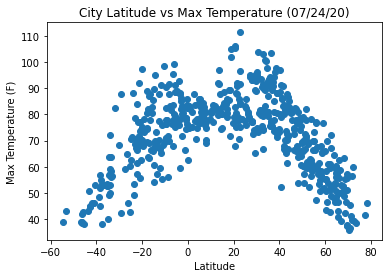

In [36]:
#create a scatter plot of latitude vs temperature

plt.scatter(weather_df["Lat"],weather_df["Max Temp"])

plt.title("City Latitude vs Max Temperature (07/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('lat_vs_temp.png')
plt.show()

In [30]:
# The above scatter plot show the relationship between a city's latitude and its max temperature on 07/24/21.
# As can be seen, latitudes further from zero tend to have lower max temperatures on this date.

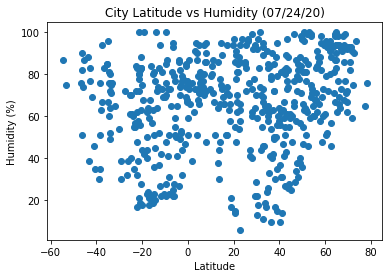

In [37]:
# create a scatter plot of latitude vs humidity
plt.scatter(weather_df["Lat"],weather_df["Humidity"])

plt.title("City Latitude vs Humidity (07/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('lat_vs_humidity.png')
plt.show()

In [31]:
# The above scatter plot shows the relationship between a city's latitude and its humidity on 07/24/21
# There appears to be no significant correlation between the two on this date.


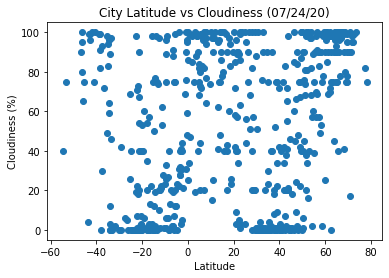

In [39]:
#create a scatter plot of latitude vs cloudiness

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])

plt.title("City Latitude vs Cloudiness (07/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('lat_vs_cloudiness.png')
plt.show()

In [33]:
# The above scatter plot show the relationship between a city's latitude and its humidity on 07/24/21
# There does not appear to be a significant correlation, howevever the data seems to fall more at high or low degrees of cloudiness
# than at more moderate degrees of cloudiness

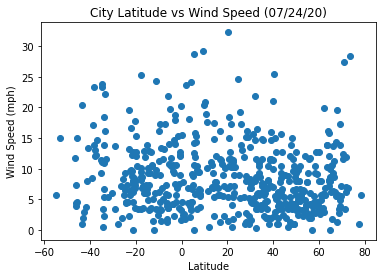

In [41]:
#create a scatter plot of latitude vs wind speed

plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])

plt.title("City Latitude vs Wind Speed (07/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('lat_vs_wind.png')
plt.show()

In [35]:
# The above scatter plot show the relationship between a city's latitude and its wind speed on 07/24/21
# There does not appear to be a particularly significant correlation between the two on this date